# <center>Regresión Ordinal</center>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import friedmanchisquare, wilcoxon
from scipy.stats import kruskal
import statsmodels.stats.multicomp as mc
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### Cargamos y limpiamos los datos de la temporada 21/22 de la Premier League (Inglaterra):

In [2]:
# Cargamos los datos de un archivo
premier_2122 = pd.read_excel("../datasets/Premier League.xlsx", sheet_name = "2122")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
premier_2122["League"] = "Premier League"
premier_2122["Final"] = "Permanencia"
premier_2122["Equipo"] = "2122"
for i in range(len(premier_2122)):
    if premier_2122["Squad"][i] in ["Manchester City", "Liverpool", "Chelsea", "Tottenham", "Arsenal", "Manchester Utd"]:
        premier_2122["Final"][i] = "Europa"
    elif premier_2122["Squad"][i] in ["Norwich City", "Watford", "Burnley"]:
         premier_2122["Final"][i] = "Descenso"       
premier_2122["Equipo"] = premier_2122["Squad"]+" - 2122"    
# Seleccionamos las columnas que nos interesan
premier_2122 = premier_2122.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2660734404.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_2122["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2660734404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_2122["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 20/21 de la Premier League (Inglaterra):

In [3]:
# Cargamos los datos de un archivo
premier_2021 = pd.read_excel("../datasets/Premier League.xlsx", sheet_name = "2021")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
premier_2021["League"] = "Premier League"
premier_2021["Final"] = "Permanencia"
premier_2021["Equipo"] = "2021"
for i in range(len(premier_2021)):
    if premier_2021["Squad"][i] in ["Manchester City", "Liverpool", "Chelsea", "Manchester Utd", "Leicester City", "West Ham"]:
        premier_2021["Final"][i] = "Europa"
    elif premier_2021["Squad"][i] in ["Sheffield Utd", "West Brom", "Fulham"]:
        premier_2021["Final"][i] = "Descenso"
premier_2021["Equipo"] = premier_2021["Squad"]+" - 2021"
# Seleccionamos las columnas que nos interesan
premier_2021 = premier_2021.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1578188801.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_2021["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1578188801.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_2021["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 19/20 de la Premier League (Inglaterra):

In [4]:
# Cargamos los datos de un archivo
premier_1920 = pd.read_excel("../datasets/Premier League.xlsx", sheet_name = "1920")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
premier_1920["League"] = "Premier League"
premier_1920["Final"] = "Permanencia"
premier_1920["Equipo"] = "1920"
for i in range(len(premier_1920)):
    if premier_1920["Squad"][i] in ["Manchester City", "Liverpool", "Chelsea", "Manchester Utd", "Leicester City"]:
        premier_1920["Final"][i] = "Europa"
    elif premier_1920["Squad"][i] in ["Norwich City", "Watford", "Bournemouth"]:
        premier_1920["Final"][i] = "Descenso"
premier_1920["Equipo"] = premier_1920["Squad"]+" - 1920"
# Seleccionamos las columnas que nos interesan
premier_1920 = premier_1920.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2335845812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_1920["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2335845812.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_1920["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 18/19 de la Premier League (Inglaterra):

In [5]:
# Cargamos los datos de un archivo
premier_1819 = pd.read_excel("../datasets/Premier League.xlsx", sheet_name = "1819")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
premier_1819["League"] = "Premier League"
premier_1819["Final"] = "Permanencia"
premier_1819["Equipo"] = "1819"
for i in range(len(premier_1819)):
    if premier_1819["Squad"][i] in ["Manchester City", "Liverpool", "Chelsea", "Tottenham", "Arsenal", "Manchester Utd", "Wolves"]:
        premier_1819["Final"][i] = "Europa"
    elif premier_1819["Squad"][i] in ["Huddersfield", "Fulham", "Cardiff City"]:
        premier_1819["Final"][i] = "Descenso"
premier_1819["Equipo"] = premier_1819["Squad"]+" - 1819"
# Seleccionamos las columnas que nos interesan
premier_1819 = premier_1819.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1559220757.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_1819["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1559220757.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_1819["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 17/18 de la Premier League (Inglaterra):

In [6]:
# Cargamos los datos de un archivo
premier_1718 = pd.read_excel("../datasets/Premier League.xlsx", sheet_name = "1718")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
premier_1718["League"] = "Premier League"
premier_1718["Final"] = "Permanencia"
premier_1718["Equipo"] = "1718"
for i in range(len(premier_1718)):
    if premier_1718["Squad"][i] in ["Manchester City", "Liverpool", "Chelsea", "Manchester Utd", "Tottenham", "Arsenal", "Burnley"]:
        premier_1718["Final"][i] = "Europa"
    elif premier_1718["Squad"][i] in ["West Brom", "Stoke City", "Swansea City"]:
        premier_1718["Final"] = "Descenso"
premier_1718["Equipo"] = premier_1718["Squad"]+" - 1718"
# Seleccionamos las columnas que nos interesan
premier_1718 = premier_1718.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3536091631.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premier_1718["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 21/22 de la Liga (España):

In [7]:
# Cargamos los datos de un archivo
laliga_2122 = pd.read_excel("../datasets/La Liga.xlsx", sheet_name = "2122")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
laliga_2122["League"] = "La Liga"
laliga_2122["Final"] = "Permanencia"
laliga_2122["Equipo"] = "2122"
for i in range(len(laliga_2122)):
    if laliga_2122["Squad"][i] in ["Real Madrid", "Barcelona", "Atlético Madrid", "Sevilla", "Betis", "Real Sociedad"]:
        laliga_2122["Final"][i] = "Europa"
    elif laliga_2122["Squad"][i] in ["Alavés", "Levante", "Granada"]:
        laliga_2122["Final"][i] = "Descenso"
laliga_2122["Equipo"] = laliga_2122["Squad"]+" - 2122"
# Seleccionamos las columnas que nos interesan
laliga_2122 = laliga_2122.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3052659827.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_2122["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3052659827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_2122["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 20/21 de la Liga (España):

In [8]:
# Cargamos los datos de un archivo
laliga_2021 = pd.read_excel("../datasets/La Liga.xlsx", sheet_name = "2021")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
laliga_2021["League"] = "La Liga"
laliga_2021["Final"] = "Permanencia"
laliga_2021["Equipo"] = "2021"
for i in range(len(laliga_2021)):
    if laliga_2021["Squad"][i] in ["Real Madrid", "Barcelona", "Atlético Madrid", "Sevilla", "Betis", "Real Sociedad", "Villarreal"]:
        laliga_2021["Final"][i] = "Europa"
    elif laliga_2021["Squad"][i] in ["Eibar", "Valladolid", "Huesca"]:
        laliga_2021["Final"][i] = "Descenso"
laliga_2021["Equipo"] = laliga_2021["Squad"]+" - 2021"
# Seleccionamos las columnas que nos interesan
laliga_2021 = laliga_2021.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2414076758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_2021["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2414076758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_2021["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 19/20 de la Liga (España):

In [9]:
# Cargamos los datos de un archivo
laliga_1920 = pd.read_excel("../datasets/La Liga.xlsx", sheet_name = "1920")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
laliga_1920["League"] = "La Liga"
laliga_1920["Final"] = "Permanencia"
laliga_1920["Equipo"] = "1920"
for i in range(len(laliga_1920)):
    if laliga_1920["Squad"][i] in ["Real Madrid", "Barcelona", "Atlético Madrid", "Sevilla", "Real Sociedad", "Villarreal", "Granada"]:
        laliga_1920["Final"][i] = "Europa"
    elif laliga_1920["Squad"][i] in ["Espanyol", "Mallorca", "Leganés"]:
        laliga_1920["Final"][i] = "Descenso"
laliga_1920["Equipo"] = laliga_1920["Squad"]+" - 1920"
# Seleccionamos las columnas que nos interesan
laliga_1920 = laliga_1920.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\463033054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_1920["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\463033054.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_1920["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 18/19 de la Liga (España):

In [10]:
# Cargamos los datos de un archivo
laliga_1819 = pd.read_excel("../datasets/La Liga.xlsx", sheet_name = "1819")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
laliga_1819["League"] = "La Liga"
laliga_1819["Final"] = "Permanencia"
laliga_1819["Equipo"] = "1819"
for i in range(len(laliga_1819)):
    if laliga_1819["Squad"][i] in ["Real Madrid", "Barcelona", "Atlético Madrid", "Sevilla", "Valencia", "Getafe", "Espanyol"]:
        laliga_1819["Final"][i] = "Europa"
    elif laliga_1819["Squad"][i] in ["Rayo Vallecano", "Huesca", "Girona"]:
        laliga_1819["Final"][i] = "Descenso"
laliga_1819["Equipo"] = laliga_1819["Squad"]+" - 1819"
# Seleccionamos las columnas que nos interesan
laliga_1819 = laliga_1819.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2444316086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_1819["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2444316086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_1819["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 17/18 de la Liga (España):

In [11]:
# Cargamos los datos de un archivo
laliga_1718 = pd.read_excel("../datasets/La Liga.xlsx", sheet_name = "1718")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
laliga_1718["League"] = "La Liga"
laliga_1718["Final"] = "Permanencia"
laliga_1718["Equipo"] = "1718"
for i in range(len(laliga_1718)):
    if laliga_1718["Squad"][i] in ["Real Madrid", "Barcelona", "Atlético Madrid", "Sevilla", "Valencia", "Villarreal", "Betis"]:
        laliga_1718["Final"][i] = "Europa"
    elif laliga_1718["Squad"][i] in ["Málaga", "Las Palmas", "La Coruña"]:
        laliga_1718["Final"][i] = "Descenso"
laliga_1718["Equipo"] = laliga_1718["Squad"]+" - 1718"
# Seleccionamos las columnas que nos interesan
laliga_1718 = laliga_1718.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3506496558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_1718["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3506496558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laliga_1718["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 21/22 de la Serie A (Italia):

In [12]:
# Cargamos los datos de un archivo
seriea_2122 = pd.read_excel("../datasets/Serie A.xlsx", sheet_name = "2122")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
seriea_2122["League"] = "Serie A"
seriea_2122["Final"] = "Permanencia"
seriea_2122["Equipo"] = "2122"
for i in range(len(seriea_2122)):
    if seriea_2122["Squad"][i] in ["Milan", "Inter", "Napoli", "Juventus", "Lazio", "Roma"]:
        seriea_2122["Final"][i] = "Europa"
    elif seriea_2122["Squad"][i] in ["Venezia", "Genoa", "Cagliari"]:
        seriea_2122["Final"][i] = "Descenso"
seriea_2122["Equipo"] = seriea_2122["Squad"]+" - 2122"
# Seleccionamos las columnas que nos interesan
seriea_2122 = seriea_2122.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\388903849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_2122["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\388903849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_2122["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 20/21 de la Serie A (Italia):

In [13]:
# Cargamos los datos de un archivo
seriea_2021 = pd.read_excel("../datasets/Serie A.xlsx", sheet_name = "2021")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
seriea_2021["League"] = "Serie A"
seriea_2021["Final"] = "Permanencia"
seriea_2021["Equipo"] = "2021"
for i in range(len(seriea_2021)):
    if seriea_2021["Squad"][i] in ["Milan", "Inter", "Napoli", "Juventus", "Lazio", "Atalanta"]:
        seriea_2021["Final"][i] = "Europa"
    elif seriea_2021["Squad"][i] in ["Parma", "Crotone", "Benevento"]:
        seriea_2021["Final"][i] = "Descenso"
seriea_2021["Equipo"] = seriea_2021["Squad"]+" - 2021"
# Seleccionamos las columnas que nos interesan
seriea_2021 = seriea_2021.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\863512359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_2021["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\863512359.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_2021["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 19/20 de la Serie A (Italia):

In [14]:
# Cargamos los datos de un archivo
seriea_1920 = pd.read_excel("../datasets/Serie A.xlsx", sheet_name = "1920")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
seriea_1920["League"] = "Serie A"
seriea_1920["Final"] = "Permanencia"
seriea_1920["Equipo"] = "1920"
for i in range(len(seriea_2122)):
    if seriea_1920["Squad"][i] in ["Milan", "Inter", "Napoli", "Juventus", "Lazio", "Roma"]:
        seriea_1920["Final"][i] = "Europa"
    elif seriea_1920["Squad"][i] in ["SPAL", "Brescia", "Lecce"]:
        seriea_1920["Final"][i] = "Descenso"
seriea_1920["Equipo"] = seriea_1920["Squad"]+" - 1920"
# Seleccionamos las columnas que nos interesan
seriea_1920 = seriea_1920.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3038537746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_1920["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3038537746.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_1920["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 18/19 de la Serie A (Italia):

In [15]:
# Cargamos los datos de un archivo
seriea_1819 = pd.read_excel("../datasets/Serie A.xlsx", sheet_name = "1819")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
seriea_1819["League"] = "Serie A"
seriea_1819["Final"] = "Permanencia"
seriea_1819["Equipo"] = "1819"
for i in range(len(seriea_1819)):
    if seriea_1819["Squad"][i] in ["Atalanta", "Inter", "Napoli", "Juventus", "Lazio", "Roma"]:
        seriea_1819["Final"][i] = "Europa"
    elif seriea_1819["Squad"][i] in ["Chievo", "Frosinone", "Empoli"]:
        seriea_1819["Final"][i] = "Descenso"
seriea_1819["Equipo"] = seriea_1819["Squad"]+" - 1819"
# Seleccionamos las columnas que nos interesan
seriea_1819 = seriea_1819.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2807876409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_1819["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2807876409.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_1819["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 17/18 de la Serie A (Italia):

In [16]:
# Cargamos los datos de un archivo
seriea_1718 = pd.read_excel("../datasets/Serie A.xlsx", sheet_name = "1718")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
seriea_1718["League"] = "Serie A"
seriea_1718["Final"] = "Permanencia"
seriea_1718["Equipo"] = "1718"
for i in range(len(seriea_1718)):
    if seriea_1718["Squad"][i] in ["Milan", "Inter", "Napoli", "Juventus", "Lazio", "Roma", "Atalanta"]:
        seriea_1718["Final"][i] = "Europa"
    elif seriea_1718["Squad"][i] in ["Benevento", "Hellas Verona", "Crotone"]:
        seriea_1718["Final"][i] = "Descenso"
seriea_1718["Equipo"] = seriea_1718["Squad"]+" - 1718"
# Seleccionamos las columnas que nos interesan
seriea_1718 = seriea_1718.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1331480230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_1718["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1331480230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriea_1718["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 21/22 de la Ligue 1 (Francia):

In [17]:
# Cargamos los datos de un archivo
ligue1_2122 = pd.read_excel("../datasets/Ligue 1.xlsx", sheet_name = "2122")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
ligue1_2122["League"] = "Ligue 1"
ligue1_2122["Final"] = "Permanencia"
ligue1_2122["Equipo"] = "2122"
for i in range(len(ligue1_2122)):
    if ligue1_2122["Squad"][i] in ["Paris S-G", "Marseille", "Monaco"]:
        ligue1_2122["Final"][i] = "Europa"
    elif ligue1_2122["Squad"][i] in ["Bordeaux", "Metz", "Saint-Étienne"]:
        ligue1_2122["Final"][i] = "Descenso"
ligue1_2122["Equipo"] = ligue1_2122["Squad"]+" - 2122"
# Seleccionamos las columnas que nos interesan
ligue1_2122 = ligue1_2122.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\267341409.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_2122["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\267341409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_2122["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 20/21 de la Ligue 1 (Francia):

In [18]:
# Cargamos los datos de un archivo
ligue1_2021 = pd.read_excel("../datasets/Ligue 1.xlsx", sheet_name = "2021")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
ligue1_2021["League"] = "Ligue 1"
ligue1_2021["Final"] = "Permanencia"
ligue1_2021["Equipo"] = "2021"
for i in range(len(ligue1_2122)):
    if ligue1_2021["Squad"][i] in ["Paris S-G", "Lille", "Monaco"]:
        ligue1_2021["Final"][i] = "Europa"
    elif ligue1_2021["Squad"][i] in ["Dijon", "Nîmes", "Nantes"]:
        ligue1_2021["Final"][i] = "Descenso"
ligue1_2021["Equipo"] = ligue1_2021["Squad"]+" - 2021"
# Seleccionamos las columnas que nos interesan
ligue1_2021 = ligue1_2021.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\4194501979.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_2021["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\4194501979.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_2021["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 19/20 de la Ligue 1 (Francia):

In [19]:
# Cargamos los datos de un archivo
ligue1_1920 = pd.read_excel("../datasets/Ligue 1.xlsx", sheet_name = "1920")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
ligue1_1920["League"] = "Ligue 1"
ligue1_1920["Final"] = "Permanencia"
ligue1_1920["Equipo"] = "1920"
for i in range(len(ligue1_1920)):
    if ligue1_1920["Squad"][i] in ["Paris S-G", "Marseille", "Rennes", "Lille", "Reims"]:
        ligue1_1920["Final"][i] = "Europa"
    elif ligue1_1920["Squad"][i] in ["Toulouse", "Amiens", "Nîmes"]:
        ligue1_1920["Final"][i] = "Descenso"
ligue1_1920["Equipo"] = ligue1_1920["Squad"]+" - 1920"
# Seleccionamos las columnas que nos interesan
ligue1_1920 = ligue1_1920.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\233151393.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_1920["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\233151393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_1920["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 18/19 de la Ligue 1 (Francia):

In [20]:
# Cargamos los datos de un archivo
ligue1_1819 = pd.read_excel("../datasets/Ligue 1.xlsx", sheet_name = "1819")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
ligue1_1819["League"] = "Ligue 1"
ligue1_1819["Final"] = "Permanencia"
ligue1_1819["Equipo"] = "1819"
for i in range(len(ligue1_1819)):
    if ligue1_1819["Squad"][i] in ["Paris S-G", "Lille", "Lyon", "Saint-Étienne"]:
        ligue1_1819["Final"][i] = "Europa"
    elif ligue1_1819["Squad"][i] in ["Guingamp", "Caen", "Dijon"]:
        ligue1_1819["Final"][i] = "Descenso"
ligue1_1819["Equipo"] = ligue1_1819["Squad"]+" - 1819"
# Seleccionamos las columnas que nos interesan
ligue1_1819 = ligue1_1819.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\258220980.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_1819["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\258220980.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_1819["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 17/18 de la Ligue 1 (Francia):

In [21]:
# Cargamos los datos de un archivo
ligue1_1718 = pd.read_excel("../datasets/Ligue 1.xlsx", sheet_name = "1718")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
ligue1_1718["League"] = "Ligue 1"
ligue1_1718["Final"] = "Permanencia"
ligue1_1718["Equipo"] = "1718"
for i in range(len(ligue1_1718)):
    if ligue1_1718["Squad"][i] in ["Paris S-G", "Marseille", "Monaco", "Lyon"]:
        ligue1_1718["Final"][i] = "Europa"
    elif ligue1_1718["Squad"][i] in ["Metz", "Troyes", "Toulouse"]:
        ligue1_1718["Final"][i] = "Descenso"
ligue1_1718["Equipo"] = ligue1_1718["Squad"]+" - 1718"
# Seleccionamos las columnas que nos interesan
ligue1_1718 = ligue1_1718.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1668681596.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_1718["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1668681596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue1_1718["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 21/22 de la Bundesliga (Alemania):

In [22]:
# Cargamos los datos de un archivo
bundesliga_2122 = pd.read_excel("../datasets/Bundesliga.xlsx", sheet_name = "2122")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
bundesliga_2122["League"] = "Bundesliga"
bundesliga_2122["Final"] = "Permanencia"
bundesliga_2122["Equipo"] = "2122"
for i in range(len(bundesliga_2122)):
    if bundesliga_2122["Squad"][i] in ["Bayern Munich", "Dortmund", "Leverkusen", "RB Leipzig", "Union Berlin", "Freiburg"]:
        bundesliga_2122["Final"][i] = "Europa"
    elif bundesliga_2122["Squad"][i] in ["Greuther Fürth", "Arminia", "Hertha BSC"]:
        bundesliga_2122["Final"][i] = "Descenso"
bundesliga_2122["Equipo"] = bundesliga_2122["Squad"]+" - 2122"
# Seleccionamos las columnas que nos interesan
bundesliga_2122 = bundesliga_2122.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\7096867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_2122["Final"][i] = "Descenso"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\7096867.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_2122["Final"][i] = "Europa"


### Cargamos y limpiamos los datos de la temporada 20/21 de la Bundesliga (Alemania):

In [23]:
# Cargamos los datos de un archivo
bundesliga_2021 = pd.read_excel("../datasets/Bundesliga.xlsx", sheet_name = "2021")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
bundesliga_2021["League"] = "Bundesliga"
bundesliga_2021["Final"] = "Permanencia"
bundesliga_2021["Equipo"] = "2021"
for i in range(len(bundesliga_2021)):
    if bundesliga_2021["Squad"][i] in ["Bayern Munich", "Dortmund", "Leverkusen", "RB Leipzig", "Wolfsburg", "Eint Frankfurt"]:
        bundesliga_2021["Final"][i] = "Europa"
    elif bundesliga_2021["Squad"][i] in ["Schalke 04", "Werder Bremen", "Köln"]:
        bundesliga_2021["Final"][i] = "Descenso"
bundesliga_2021["Equipo"] = bundesliga_2021["Squad"]+" - 2021"
# Seleccionamos las columnas que nos interesan
bundesliga_2021 = bundesliga_2021.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1392612426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_2021["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\1392612426.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_2021["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 19/20 de la Bundesliga (Alemania):

In [24]:
# Cargamos los datos de un archivo
bundesliga_1920 = pd.read_excel("../datasets/Bundesliga.xlsx", sheet_name = "1920")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
bundesliga_1920["League"] = "Bundesliga"
bundesliga_1920["Final"] = "Permanencia"
bundesliga_1920["Equipo"] = "1920"
for i in range(len(bundesliga_1920)):
    if bundesliga_1920["Squad"][i] in ["Bayern Munich", "Dortmund", "Leverkusen", "RB Leipzig", "Hoffenheim", "M'Gladbach"]:
        bundesliga_1920["Final"][i] = "Europa"
    elif bundesliga_1920["Squad"][i] in ["Paderborn 07", "Düsseldorf", "Werder Bremen"]:
        bundesliga_1920["Final"][i] = "Descenso"
bundesliga_1920["Equipo"] = bundesliga_1920["Squad"]+" - 1920"
# Seleccionamos las columnas que nos interesan
bundesliga_1920 = bundesliga_1920.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3327696750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_1920["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3327696750.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_1920["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 18/19 de la Bundesliga (Alemania):

In [25]:
# Cargamos los datos de un archivo
bundesliga_1819 = pd.read_excel("../datasets/Bundesliga.xlsx", sheet_name = "1819")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
bundesliga_1819["League"] = "Bundesliga"
bundesliga_1819["Final"] = "Permanencia"
bundesliga_1819["Equipo"] = "1819"
for i in range(len(bundesliga_1819)):
    if bundesliga_1819["Squad"][i] in ["Bayern Munich", "Dortmund", "Leverkusen", "RB Leipzig", "Wolfsburg", "M'Gladbach"]:
        bundesliga_1819["Final"][i] = "Europa"
    elif bundesliga_1819["Squad"][i] in ["Nürnberg", "Hannover 96", "Stuttgart"]:
        bundesliga_1819["Final"][i] = "Descenso"
bundesliga_1819["Equipo"] = bundesliga_1819["Squad"]+" - 1819"
# Seleccionamos las columnas que nos interesan
bundesliga_1819 = bundesliga_1819.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3297071138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_1819["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\3297071138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_1819["Final"][i] = "Descenso"


### Cargamos y limpiamos los datos de la temporada 17/18 de la Bundesliga (Alemania):

In [26]:
# Cargamos los datos de un archivo
bundesliga_1718 = pd.read_excel("../datasets/Bundesliga.xlsx", sheet_name = "1718")
# Añadimos una columna llamada "Europe" con las variables categóticas "Yes" o "No" en función de si han participado en las
# competiciones europeas: Champions League o Eurpa League
bundesliga_1718["League"] = "Bundesliga"
bundesliga_1718["Final"] = "Permanencia"
bundesliga_1718["Equipo"] = "1718"
for i in range(len(bundesliga_1718)):
    if bundesliga_1718["Squad"][i] in ["Bayern Munich", "Dortmund", "Leverkusen", "RB Leipzig", "Hoffenheim", "Schalke 04"]:
        bundesliga_1718["Final"][i] = "Europa"
    elif bundesliga_1718["Squad"][i] in ["Köln", "Hamburger SV", "Wolfsburg"]:
        bundesliga_1718["Final"][i] = "Descenso"
bundesliga_1718["Equipo"] = bundesliga_1718["Squad"]+" - 1718"
# Seleccionamos las columnas que nos interesan
bundesliga_1718 = bundesliga_1718.loc[:, ['Equipo','Possesion', 'PenaltyKicksMade', 'YellowCards','RedCards', 'Saves', 'ShotsOnTarget', 'AverageDistanceOfShots', 'ShortPassesCompleted', 'MediumPassesCompleted', 'LongPassesCompleted', 'PassingTypeLive', 'PassingTypeDead', 'PassingTypeFreeKicks', 'PassingTypeBetweenBackDefenders', 'PassingTypeLongWidth', 'PassingTypeCrosses', 'PassingTypeThrows-In', 'PassingTypeCorners', 'DriblesAttempted', 'TouchesDefPen', 'TouchesDef3rd', 'TouchesMid3rd', 'TouchesAtt3rd', 'TouchesAttPen', 'AerialDuelsWon', 'FoulsCommited', 'Offsides', 'Interceptions', 'League', 'Final']]

C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2990956420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_1718["Final"][i] = "Europa"
C:\Users\nicol\AppData\Local\Temp\ipykernel_1468\2990956420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga_1718["Final"][i] = "Descenso"


### Concatenamos todos los data frames creados

In [27]:
data = pd.concat([premier_2122, premier_2021, premier_1920, premier_1819, premier_1718])
data = pd.concat([data, laliga_2122, laliga_2021, laliga_1920, laliga_1819, laliga_1718])
data = pd.concat([data, seriea_2122, seriea_2021, seriea_1920, seriea_1819, seriea_1718])
data = pd.concat([data, ligue1_2122, ligue1_2021, ligue1_1920, ligue1_1819, ligue1_1718])
data = pd.concat([data, bundesliga_2122, bundesliga_2021, bundesliga_1920, bundesliga_1819, bundesliga_1718])

### Mezclamos las filas del dataset

In [28]:
data = data.sample(frac=1).reset_index(drop=True)

### Quitamos la variable "League"

In [29]:
competicion_col = data["League"].values # Nos guardamos las competiciones de cada equipo en una variable
data = data.drop("League", axis = 1)
equipos_col = data["Equipo"].values
data = data.drop("Equipo", axis = 1)

### Definimos las variables predictoras y la variable objetivo

In [30]:
column_names_Y = "Final"
Y = []
for i in range(len(data[column_names_Y])):
    if data[column_names_Y][i] == 'Descenso':
        Y.append(0)
    elif data[column_names_Y][i] == 'Permanencia':
        Y.append(1)
    elif data[column_names_Y][i] == 'Europa':
        Y.append(2)
Y = np.array(Y)
column_names_X = [v for v in data if v != "Final"]
X = data[column_names_X]

### Normalizamos las variables predictoras

In [31]:
# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Normalizar el DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=column_names_X)

### Implementamos el modelo

In [32]:
# Añadir una columna de unos para el intercepto en X
X = sm.add_constant(X)

# Ajustar el modelo de regresión ordinal
model = sm.MNLogit(Y, X)
result = model.fit()

# Imprimir el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579421
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  490
Model:                        MNLogit   Df Residuals:                      432
Method:                           MLE   Df Model:                           56
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.4247
Time:                        13:02:04   Log-Likelihood:                -283.92
converged:                       True   LL-Null:                       -493.52
Covariance Type:            nonrobust   LLR p-value:                 4.701e-57
                            y=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.0084      0.242      8.312  

In [33]:
# Obtener los coeficientes de regresión
coeficientes = result.params

### Coeficientes de regresión

In [34]:
coeficientes

,0,1
const,2.008410,0.302619
Possesion,-0.146153,0.153159
PenaltyKicksMade,0.302831,0.852959
YellowCards,-0.074432,0.055595
RedCards,0.011799,-0.330810
Saves,-0.419109,-0.819967
ShotsOnTarget,1.460134,2.200013
AverageDistanceOfShots,-0.622819,-0.625696
ShortPassesCompleted,3.271375,6.566548
MediumPassesCompleted,0.527646,0.865616


### Odds ratios

In [35]:
# Calcular los odds ratios
odds_ratios = np.exp(coeficientes)
odds_ratios

,0,1
const,7.451460,1.353398
Possesion,0.864025,1.165510
PenaltyKicksMade,1.353686,2.346581
YellowCards,0.928270,1.057170
RedCards,1.011869,0.718342
Saves,0.657632,0.440446
ShotsOnTarget,4.306537,9.025133
AverageDistanceOfShots,0.536430,0.534889
ShortPassesCompleted,26.347532,710.911851
MediumPassesCompleted,1.694937,2.376468


### Creamos una tabla auxiliar para facilitar la creación del gráfico de odds ratios

In [36]:
params = list(result.params[0][1:29])
conf = result.conf_int()[1:29]
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
#odds

### Gráfico de odds ratios para comparar la categoría 0 (Descenso) con la categoría 1 (Permanencia)

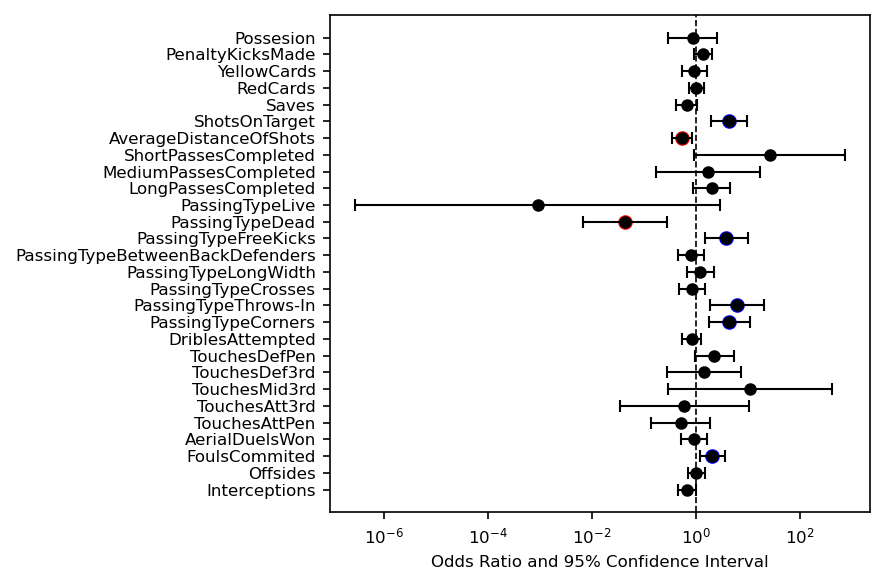

In [37]:
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=np.array([tupla[1] for tupla in odds.iloc[::-1].index.values]), xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.xscale('log')  # Cambio para escala logarítmica en el eje x
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
# Obtener índices de los puntos a pintar
indices_rojo = np.where((odds.iloc[::-1]['97.5%'].values <= 1))[0]
indices_azul = np.where((odds.iloc[::-1]['2.5%'].values >= 1))[0]

# Pintar los puntos en rojo y azul
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_rojo], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_rojo], color='red', label='Intervalo a la derecha de x=1')
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_azul], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_azul], color='blue', label='Intervalo a la izquierda de x=1')

plt.show()

### Creamos una tabla auxiliar para facilitar la creación del gráfico de odds ratios

In [38]:
params = list(result.params[1][1:29])
conf = result.conf_int()[30:58]
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
#odds

### Gráfico de odds ratios para comparar la categoría 0 (Descenso) con la categoría 2 (Europa)

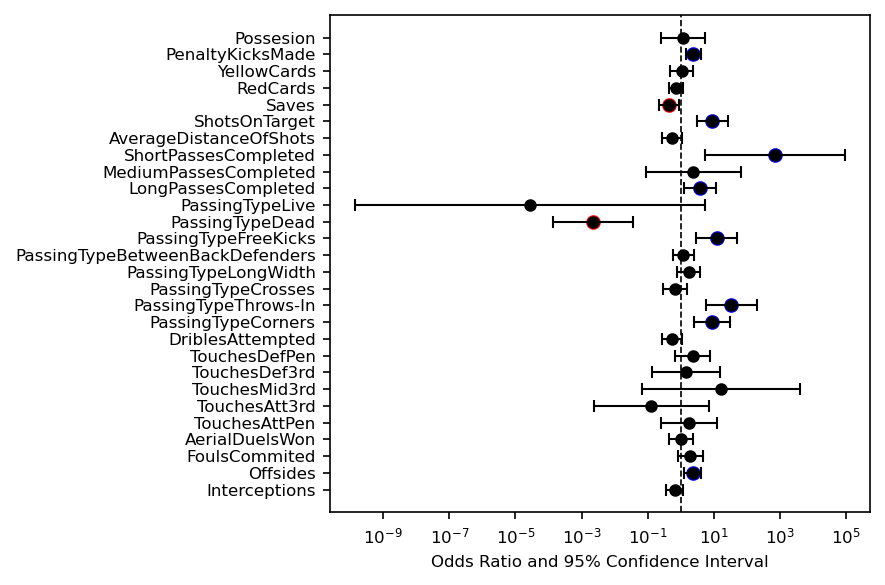

In [39]:
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=np.array([tupla[1] for tupla in odds.iloc[::-1].index.values]), xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.xscale('log')  # Cambio para escala logarítmica en el eje x
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
# Obtener índices de los puntos a pintar
indices_rojo = np.where((odds.iloc[::-1]['97.5%'].values <= 1))[0]
indices_azul = np.where((odds.iloc[::-1]['2.5%'].values >= 1))[0]

# Pintar los puntos en rojo y azul
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_rojo], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_rojo], color='red', label='Intervalo a la derecha de x=1')
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_azul], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_azul], color='blue', label='Intervalo a la izquierda de x=1')

plt.show()

# <center>Método STEPWISE</center>

In [40]:
def stepwise_feature_selection(X, y, initial_list=[], threshold_in=0.3, threshold_out=0.15, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        best_pval_max = 1
        for new_column in excluded:
            model = sm.MNLogit(y, sm.add_constant(X[included + [new_column]])).fit(disp=False)
            pvals = model.pvalues
            if pvals.loc[new_column][0] < pvals.loc[new_column][1]:
                aux_pval_min_min = pvals.loc[new_column][0]
                aux_pval_min_max = pvals.loc[new_column][1]
            else:
                aux_pval_min_max = pvals.loc[new_column][0]
                aux_pval_min_min = pvals.loc[new_column][1]
                        
            if aux_pval_min_max < best_pval_max and new_column != "const":
                best_pval_max = aux_pval_min_max
                best_feature = new_column
        if best_pval_max < threshold_in:
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add {:30} with p-value {:.6f}'.format(best_feature, best_pval_max))
        if not changed:
            break

    return included

In [41]:
stepwise_feature_selection(X, Y)

Add ShotsOnTarget                  with p-value 0.000007
Add Saves                          with p-value 0.000551
Add Interceptions                  with p-value 0.019456
Add PenaltyKicksMade               with p-value 0.069679
Add TouchesAtt3rd                  with p-value 0.062799
Add AverageDistanceOfShots         with p-value 0.014418
Add PassingTypeLongWidth           with p-value 0.078507
Add ShortPassesCompleted           with p-value 0.267457
Add FoulsCommited                  with p-value 0.206574
Add TouchesDef3rd                  with p-value 0.251171


['ShotsOnTarget',
 'Saves',
 'Interceptions',
 'PenaltyKicksMade',
 'TouchesAtt3rd',
 'AverageDistanceOfShots',
 'PassingTypeLongWidth',
 'ShortPassesCompleted',
 'FoulsCommited',
 'TouchesDef3rd']

## Implementación del modelo con las variables seleccionadas

In [42]:
#Select our final 3 features.
final_features = ['ShotsOnTarget',
 'Saves',
 'Interceptions',
 'PenaltyKicksMade',
 'TouchesAtt3rd',
 'AverageDistanceOfShots',
 'PassingTypeLongWidth',
 'ShortPassesCompleted',
 'FoulsCommited',
 'TouchesDef3rd']
final_X = X[final_features]
final_model = sm.MNLogit(Y, sm.add_constant(final_X)).fit()
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.648676
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  490
Model:                        MNLogit   Df Residuals:                      468
Method:                           MLE   Df Model:                           20
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.3559
Time:                        13:02:09   Log-Likelihood:                -317.85
converged:                       True   LL-Null:                       -493.52
Covariance Type:            nonrobust   LLR p-value:                 2.371e-62
==========================================================================================
                   y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.8863      0.216      8.718      0.000       1.462       2.310
ShotsOnTarget              1.4588      0.315      4.638      0.000       0.842       2.075
Saves                     -0.4324      0.165     -2.625      0.009      -0.755      -0.109
Interceptions             -0.2775      0.144     -1.921      0.055      -0.561       0.006
PenaltyKicksMade           0.2527      0.170      1.484      0.138      -0.081       0.587
TouchesAtt3rd             -1.7775      0.437     -4.063      0.000      -2.635      -0.920
AverageDistanceOfShots    -0.5846      0.171     -3.423      0.001      -0.919      -0.250
PassingTypeLongWidth       0.2971      0.188      1.582      0.114      -0.071       0.665
ShortPassesCompleted       0.8686      0.441      1.972      0.049       0.005       1.732
FoulsCommited              0.4070      0.161      2.520      0.012       0.090       0.724
TouchesDef3rd             -0.2274      0.198     -1.148      0.251      -0.616       0.161
------------------------------------------------------------------------------------------
                   y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4721      0.259      1.820      0.069      -0.036       0.981
ShotsOnTarget              2.7310      0.411      6.649      0.000       1.926       3.536
Saves                     -1.1314      0.257     -4.408      0.000      -1.634      -0.628
Interceptions             -0.4761      0.214     -2.222      0.026      -0.896      -0.056
PenaltyKicksMade           0.6860      0.224      3.067      0.002       0.248       1.124
TouchesAtt3rd             -2.5549      0.555     -4.601      0.000      -3.643      -1.467
AverageDistanceOfShots    -1.0889      0.236     -4.613      0.000      -1.551      -0.626
PassingTypeLongWidth       0.6324      0.243      2.601      0.009       0.156       1.109
ShortPassesCompleted       1.9833      0.569      3.484      0.000       0.868       3.099
FoulsCommited              0.3047      0.230      1.324      0.186      -0.146       0.756
TouchesDef3rd             -0.6162      0.269     -2.295      0.022      -1.142      -0.090
==========================================================================================
"""

In [43]:
(final_model.pvalues.loc["ShotsOnTarget"][0] + final_model.pvalues.loc["ShotsOnTarget"][1])/2

1.7587011654470258e-06

In [44]:
final_model.prsquared

0.3559455508233845

In [45]:
final_model.params[1][1:]

ShotsOnTarget             2.730988
Saves                    -1.131413
Interceptions            -0.476140
PenaltyKicksMade          0.686037
TouchesAtt3rd            -2.554940
AverageDistanceOfShots   -1.088856
PassingTypeLongWidth      0.632374
ShortPassesCompleted      1.983318
FoulsCommited             0.304678
TouchesDef3rd            -0.616206
Name: 1, dtype: float64

In [46]:
final_model.conf_int()[12:22]

lower     upper
y                                           
2 ShotsOnTarget           1.925944  3.536032
  Saves                  -1.634461 -0.628366
  Interceptions          -0.896122 -0.056159
  PenaltyKicksMade        0.247582  1.124493
  TouchesAtt3rd          -3.643369 -1.466511
  AverageDistanceOfShots -1.551459 -0.626253
  PassingTypeLongWidth    0.155865  1.108884
  ShortPassesCompleted    0.867620  3.099016
  FoulsCommited          -0.146493  0.755848
  TouchesDef3rd          -1.142476 -0.089937

In [47]:
params = list(final_model.params[0][1:])
conf = final_model.conf_int()[1:11]
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
odds

2.5%     97.5%  Odds Ratio
y                                                       
1 ShotsOnTarget           2.321760  7.966528    4.300740
  Saves                   0.469913  0.896285    0.648981
  Interceptions           0.570832  1.005621    0.757654
  PenaltyKicksMade        0.922051  1.797948    1.287556
  TouchesAtt3rd           0.071725  0.398519    0.169068
  AverageDistanceOfShots  0.398783  0.778864    0.557313
  PassingTypeLongWidth    0.931570  1.944712    1.345970
  ShortPassesCompleted    1.005176  5.652112    2.383562
  FoulsCommited           1.094661  2.061641    1.502264
  TouchesDef3rd           0.540145  1.174724    0.796568

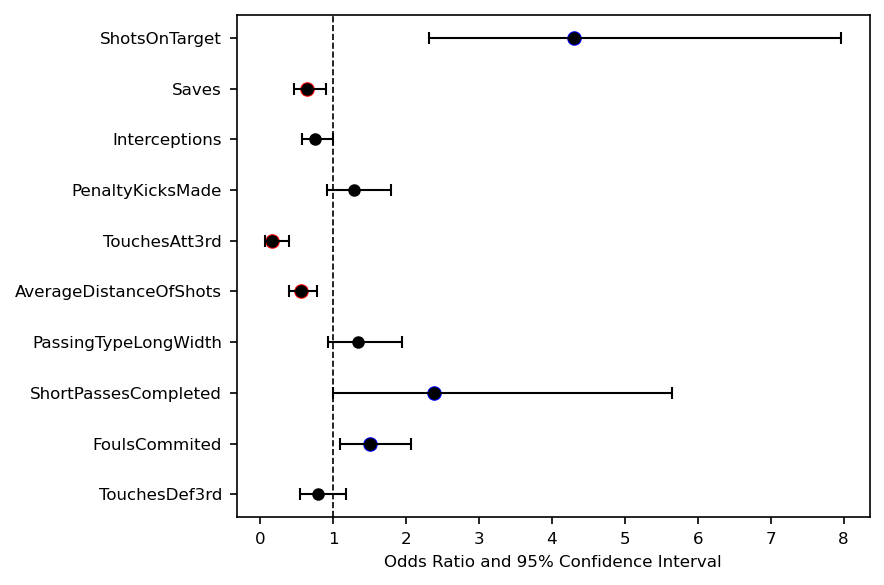

In [48]:
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=np.array([tupla[1] for tupla in odds.iloc[::-1].index.values]), xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
# Obtener índices de los puntos a pintar
indices_rojo = np.where((odds.iloc[::-1]['97.5%'].values <= 1))[0]
indices_azul = np.where((odds.iloc[::-1]['2.5%'].values >= 1))[0]

# Pintar los puntos en rojo y azul
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_rojo], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_rojo], color='red', label='Intervalo a la derecha de x=1')
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_azul], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_azul], color='blue', label='Intervalo a la izquierda de x=1')

plt.show()

In [49]:
params = list(final_model.params[1][1:])
conf = final_model.conf_int()[12:22]
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
odds

2.5%      97.5%  Odds Ratio
y                                                        
2 ShotsOnTarget           6.861622  34.330423   15.348042
  Saves                   0.195058   0.533463    0.322577
  Interceptions           0.408149   0.945389    0.621176
  PenaltyKicksMade        1.280924   3.078654    1.985830
  TouchesAtt3rd           0.026164   0.230729    0.077697
  AverageDistanceOfShots  0.211939   0.534591    0.336601
  PassingTypeLongWidth    1.168669   3.030974    1.882074
  ShortPassesCompleted    2.381237  22.176126    7.266816
  FoulsCommited           0.863732   2.129416    1.356188
  TouchesDef3rd           0.319028   0.913989    0.539989

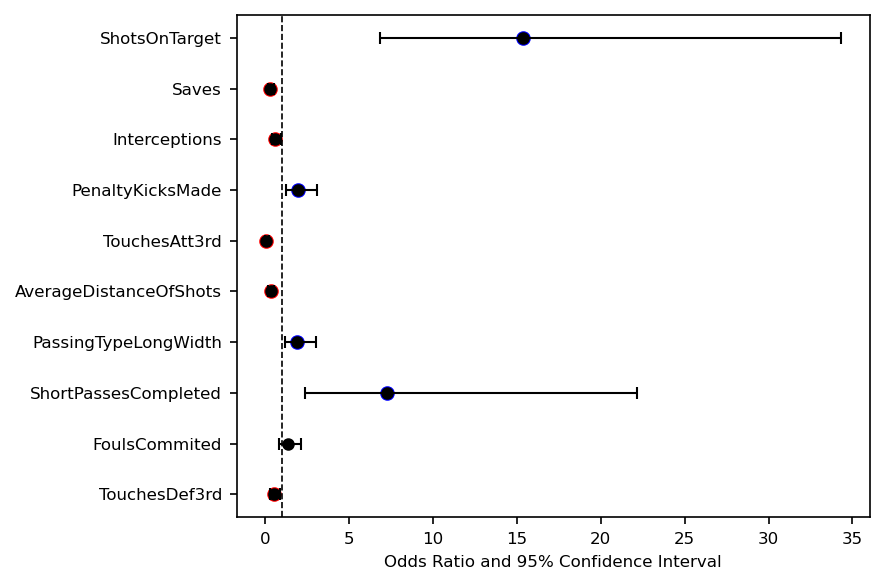

In [50]:
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=np.array([tupla[1] for tupla in odds.iloc[::-1].index.values]), xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
# Obtener índices de los puntos a pintar
indices_rojo = np.where((odds.iloc[::-1]['97.5%'].values <= 1))[0]
indices_azul = np.where((odds.iloc[::-1]['2.5%'].values >= 1))[0]

# Pintar los puntos en rojo y azul
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_rojo], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_rojo], color='red', label='Intervalo a la derecha de x=1')
plt.scatter(odds.iloc[::-1]['Odds Ratio'].iloc[indices_azul], np.array([tupla[1] for tupla in odds.iloc[::-1].index.values])[indices_azul], color='blue', label='Intervalo a la izquierda de x=1')

plt.show()